Script by Lars Kjær

The code is the second part of our work with handling the outliers. The first part is in the notebook "Find_matching_row". This notebook builds upon the data produced by the code in the first note book. It handles the remaining outliers in a methodical way that is grounded in literature and a statistical method. _Source Eric Kleppen : https://careerfoundry.com/en/blog/data-analytics/how-to-find-outliers/_

The approach follows three steps. First step is to use data visualisation to verify the presents of outliers. The second step is to use a statistical method to calculate the outliers. The third step is to drop or transform the outliers. 

In [157]:
##################### Import libraries ################################

import pandas as pd
import os
import re
from pathlib import Path
import tqdm

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [184]:
'''
The function takes a pandas Series (data) as input 
and calculates the first and third quartiles along with the IQR. 
Then it identifies outliers using the IQR-based method and 
returns a new DataFrame (outliers_dropped) with the outliers.

The function is written by Eric Kleppen but implemented by the me to work on our data.  
'''


def drop_outliers_IQR(data): # takes a series
    
   # Calculate the first quartile (Q1) and the third quartile (Q3)
    q1=data.quantile(0.25)

    q3=data.quantile(0.75)
   
    # Calculate the Interquartile Range (IQR)
    IQR=q3-q1
    
    # Determine the lower and upper bounds for outliers and
    # select data points that are not outliers based on the bounds
    not_outliers = data[~((data<(q1-1.5*IQR)) | (data>(q3+1.5*IQR)))]

    outliers_dropped = outliers.dropna().reset_index()

    return outliers_dropped # return dataframe 

In [185]:
# Replace 'your_file.csv' with the actual path to your CSV file
input_fp = Path.cwd() / 'unique_data' # path of files to be found

output_fp = Path.cwd() / 'inlier_data' # output path of files generated
# Use the Path object to actually create the subfolder
Path.mkdir(output_fp, exist_ok=True)

for filename in tqdm.tqdm(sorted(os.listdir(input_fp))): # 
    if filename.startswith('unique_sales_1992_2022_') and filename.endswith('.csv'):
        df = pd.read_csv(input_fp/filename) # read the CSV file into a DataFrame
        drop_outliers = drop_outliers_IQR(df['square meters_price'])
        output_df = df[~df.index.isin(list(drop_outliers['index']))]
        
        # save file
        # Rename and save the new DataFrame to a CSV file without index numbers
        output_filename = filename.replace('unique_', 'inlier_')
        output_df.to_csv(f'{output_fp}/{output_filename}', index=False)

100%|████████████████████████████████████████████████████████████████████████████████████| 2/2 [00:00<00:00, 17.39it/s]


# Detecting and Filtering Outliers

The following is a walkthrough of the code above.

In [186]:
# Import a subset of data 
df = pd.read_csv(r'unique_data/unique_sales_1992_2022_161.csv')

df.describe()

,municipality,zip_code,purchase_amount,square meters,square meters_price,rooms,year_of_construction
count,7842.0,7842.0,7.842000e+03,7842.000000,7842.000000,7842.000000,7842.000000
mean,161.0,2600.0,1.809714e+06,108.927825,16982.754782,3.839199,1961.276843
std,0.0,0.0,1.787723e+06,44.286909,14282.203506,1.581612,47.660872
min,161.0,2600.0,1.750000e+04,38.000000,222.000000,1.000000,0.000000
25%,161.0,2600.0,8.695650e+05,73.000000,9385.750000,3.000000,1943.000000
50%,161.0,2600.0,1.500000e+06,106.000000,15332.000000,4.000000,1960.000000
75%,161.0,2600.0,2.465000e+06,138.000000,22866.750000,5.000000,1975.000000
max,161.0,2600.0,6.347990e+07,388.000000,466764.000000,14.000000,2022.000000


# Use data visualisation to verify the presents of outliers

I use historgram and box plot as visualization methods to find outliers in data.


The histogram illustrates how the data is distributed. Eric Kleppen writes: _Having data that follows a normal distribution is necessary for some of the statistical techniques used to detect outliers. If the data doesn’t follow a normal distribution, the z-score calculation shouldn’t be used to find the outliers._ 

In [187]:
import seaborn as sns

<Axes: xlabel='square meters_price', ylabel='Count'>

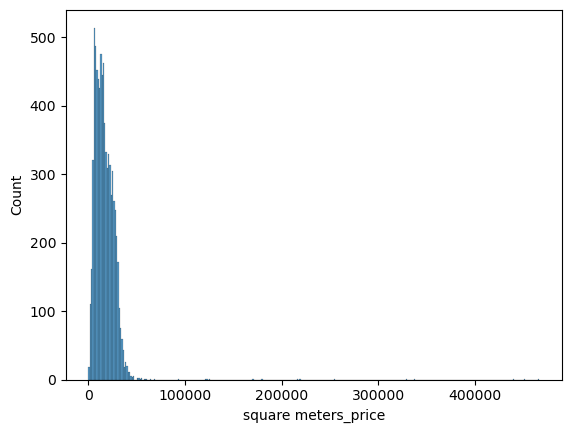

In [188]:
sns.histplot(df, x='square meters_price')

Notice the data does not follow a normal distribution. Since the data is skewed, instead of using a z-score we can use **interquartile range (IQR)** to determine the outliers. We will explore using IQR after reviewing the other visualization techniques.

# Find outliers in data using a box plot


<Axes: ylabel='square meters_price'>

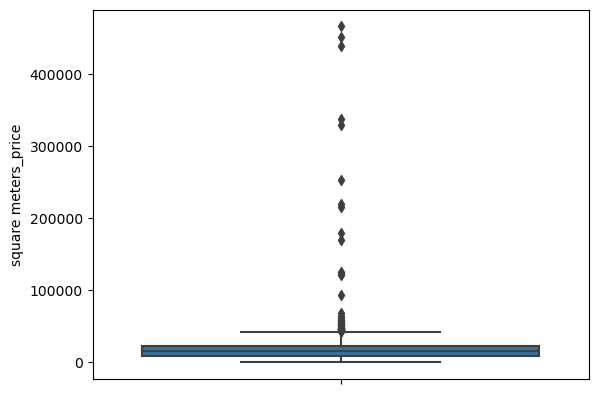

In [189]:
#create a box plot

sns.boxplot(df, y='square meters_price')

# Find outliers using statistical methods and drop them

Using this method, we essentially drop all the outliers from the data, excluding them from the analysis and modeling. Although this technique is quick and easy, it isn’t always the right solution and can reduce the amount of data if there are a lot of outliers present. 

Copy and paste the find_outliers_IQR function **( IQR = interquartile range )** so we can modify it to return a dataframe with the outliers removed. Rename it drop_outliers_IQR . Inside the function we create a dataframe named not_outliers that replaces the outlier values with a NULL. Then we can use .dropna(), to drop the rows with NULL values. 

In [190]:
# we will calculate the outlier data points using the statistical method called interquartile range (IQR) instead of using Z-score. Using the IQR, the outlier data points are the ones falling below Q1–1.5 IQR or above Q3 + 1.5 IQR. The Q1 is the 25th percentile and Q3 is the 75th percentile of the dataset, and IQR represents the interquartile range calculated by Q3 minus Q1 (Q3–Q1). 

# Using the convenient pandas .quantile() function, 
# we can create a simple Python function that takes in our column from the dataframe and outputs the outliers:

#create a function to find outliers using IQR


def drop_outliers_IQR(df):

   q1=df.quantile(0.25)

   q3=df.quantile(0.75)

   IQR=q3-q1

   not_outliers = df[~((df<(q1-1.5*IQR)) | (df>(q3+1.5*IQR)))]

   outliers_dropped = outliers.dropna().reset_index()

   return outliers_dropped, 'rows dropped: ', len(outliers_dropped), 'rows before: ', len(df)


new_df = df.copy()
dropped_outl = drop_outliers_IQR(new_df)[0] # apply fiunction
output_df = new_df.drop(list(dropped_outl['index']))
        

<Axes: xlabel='square meters_price', ylabel='Count'>

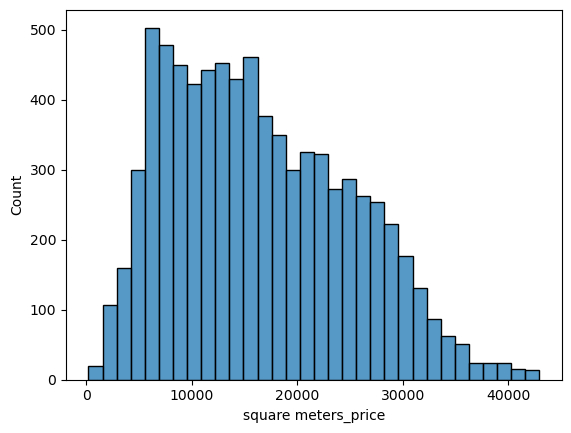

In [191]:
sns.histplot(out_put_df, x='square meters_price')

<Axes: ylabel='square meters_price'>

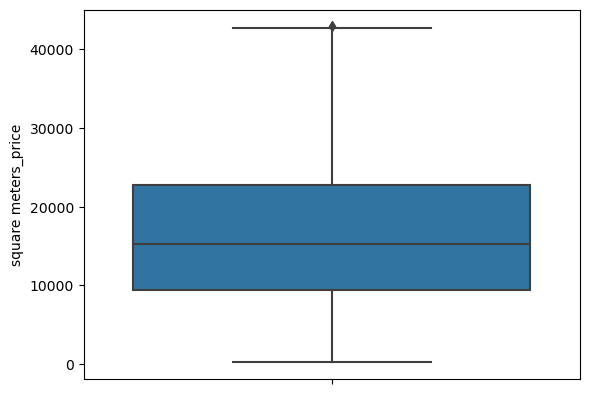

In [192]:
#create a box plot

sns.boxplot(out_put_df, y='square meters_price')